<a href="https://colab.research.google.com/github/naufalfadilla/Banks-Historical-Stock-Price/blob/main/UAS_Analitika_Data_Muhammad_Naufal_Fadillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

import pandas as pd: Pandas adalah pustaka Python yang digunakan untuk
manipulasi dan analisis data. Dalam kode ini, saya menggunakan akronim pd untuk mengakses fungsi dan objek dalam pustaka pandas.

import numpy as np: NumPy adalah pustaka Python yang digunakan untuk komputasi numerik. Dalam kode ini, saya menggunakan akronim np untuk mengakses fungsi dan objek dalam pustaka NumPy.

import matplotlib.pyplot as plt: Matplotlib adalah pustaka Python yang digunakan untuk visualisasi data. Dalam kode ini, saya menggunakan akronim plt untuk mengakses fungsi dan objek dalam pustaka Matplotlib.

import seaborn as sns: Seaborn adalah pustaka Python yang dibangun di atas Matplotlib untuk visualisasi data statistik. Dalam kode ini, saya menggunakan akronim sns untuk mengakses fungsi dan objek dalam pustaka Seaborn.

import math: Ini adalah impor dari modul matematika bawaan Python. Modul ini berisi fungsi-fungsi matematika yang sering digunakan.

import datetime: Ini adalah impor dari modul datetime bawaan Python. Modul ini berisi fungsi-fungsi untuk bekerja dengan tanggal dan waktu.

%matplotlib inline: Ini adalah perintah khusus yang digunakan dalam Jupyter Notebook untuk menampilkan plot Matplotlib di dalam output notebook.

**Import Dataset**

Dataset source : https://drive.google.com/file/d/1gQPkCy4qQpIeH5I7eaLDk3Nla2SW65U2/view?usp=sharing

Berikut adalah sumber dataset yang digunakan dalam bentuk link Google Drive.

In [2]:
# https://drive.google.com/file/d/1gQPkCy4qQpIeH5I7eaLDk3Nla2SW65U2/view?usp=sharing

!gdown 1gQPkCy4qQpIeH5I7eaLDk3Nla2SW65U2

Downloading...
From: https://drive.google.com/uc?id=1gQPkCy4qQpIeH5I7eaLDk3Nla2SW65U2
To: /content/AFL.csv
100% 418k/418k [00:00<00:00, 95.8MB/s]


Mengupload file CSV yang digunakan ke Google Drive lalu mendownload file csv tersebut dengan mencantumakn link Google Drive berisi file csv yang telah ditambahkan.

In [3]:
train_data = pd.read_csv('AFL.csv')
train_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,23.370001,23.125000,23.325001,23.285000,3609200.0,16.394802
1,2006-01-04,23.459999,23.299999,23.350000,23.415001,4377000.0,16.486334
2,2006-01-05,23.665001,23.424999,23.455000,23.605000,3570200.0,16.620115
3,2006-01-06,24.575001,24.180000,24.450001,24.450001,4166400.0,17.215076
4,2006-01-09,24.700001,24.485001,24.514999,24.565001,3697800.0,17.296038


Kode tersebut membaca file CSV dengan nama 'AFL.csv' dan memuat datanya ke dalam sebuah objek DataFrame yang disebut train_data menggunakan fungsi pd.read_csv('AFL.csv') dari pustaka pandas.

Setelah itu, train_data.head() digunakan untuk menampilkan beberapa baris pertama dari DataFrame train_data. Fungsi head() digunakan untuk melihat pratinjau cepat dari data yang dimuat, dengan default menampilkan lima baris pertama.

Check missing values

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3749 non-null   object 
 1   High       3749 non-null   float64
 2   Low        3749 non-null   float64
 3   Open       3749 non-null   float64
 4   Close      3749 non-null   float64
 5   Volume     3749 non-null   float64
 6   Adj Close  3749 non-null   float64
dtypes: float64(6), object(1)
memory usage: 205.1+ KB


Check statistic vales for every features

Kode train_data.info() digunakan untuk memberikan informasi tentang struktur dan tipe data yang ada di dalam DataFrame train_data. Fungsi info() pada objek DataFrame memberikan ringkasan tentang DataFrame tersebut, termasuk:

a. Jumlah total baris (entries)

b. Tipe data (data types) dari setiap kolom

c. Jumlah nilai non-null (non-null values) di setiap kolom

d. Penggunaan memori oleh DataFrame

In [5]:
train_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3749.000000,3749.000000,3749.000000,3749.000000,3.749000e+03,3749.000000
mean,31.339884,30.719044,31.033050,31.032573,5.670577e+06,26.618860
std,9.435710,9.440224,9.431340,9.429982,4.751791e+06,10.606790
min,6.245000,5.415000,5.570000,5.745000,9.847000e+05,4.284565
25%,24.010000,23.520000,23.809999,23.805000,3.147600e+06,18.319775
50%,30.000000,29.459999,29.745001,29.719999,4.422100e+06,24.320778
75%,36.250000,35.639999,35.935001,35.950001,6.548200e+06,33.004658
max,57.180000,56.560001,57.150002,56.889999,9.266680e+07,54.794922


Handle datetime data for time series

Kode train_data.describe() digunakan untuk menghasilkan ringkasan statistik deskriptif dari dataset yang terdapat dalam DataFrame train_data. Fungsi describe() pada objek DataFrame memberikan informasi statistik seperti:

a. Jumlah data (count): Jumlah nilai non-null yang ada dalam setiap kolom.

b. Nilai rata-rata (mean): Rata-rata aritmatika dari setiap kolom.

c. Standar deviasi (standard deviation): Ukuran dispersi atau variasi data dalam setiap kolom.

d. Nilai minimum (minimum): Nilai terkecil dalam setiap kolom.

e. Kuartil (25%, 50%, 75%): Nilai yang membagi data ke dalam empat bagian yang sama besar, sehingga menggambarkan sebaran data.

f. Nilai maksimum (maximum): Nilai terbesar dalam setiap kolom.

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,23.370001,23.125000,23.325001,23.285000,3609200.0,16.394802
2006-01-04,23.459999,23.299999,23.350000,23.415001,4377000.0,16.486334
2006-01-05,23.665001,23.424999,23.455000,23.605000,3570200.0,16.620115
2006-01-06,24.575001,24.180000,24.450001,24.450001,4166400.0,17.215076
2006-01-09,24.700001,24.485001,24.514999,24.565001,3697800.0,17.296038


pd.to_datetime(train_data['Date']): Baris ini mengkonversi kolom 'Date' dalam DataFrame menjadi objek tipe datetime menggunakan fungsi pd.to_datetime(). Ini memungkinkan manipulasi lebih lanjut dengan tanggal dan waktu.

train_data.set_index('Date', inplace=True): Baris ini mengatur kolom 'Date'  sebagai indeks DataFrame menggunakan metode set_index(). Dengan mengatur kolom 'Date' sebagai indeks, data dapat diakses berdasarkan tanggal secara lebih efisien dan melakukan operasi yang berkaitan dengan deret waktu.

Setelah operasi ini dilakukan, train_data akan memiliki indeks yang berupa tanggal dan dapat digunakan untuk analisis dan manipulasi data berdasarkan tanggal.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

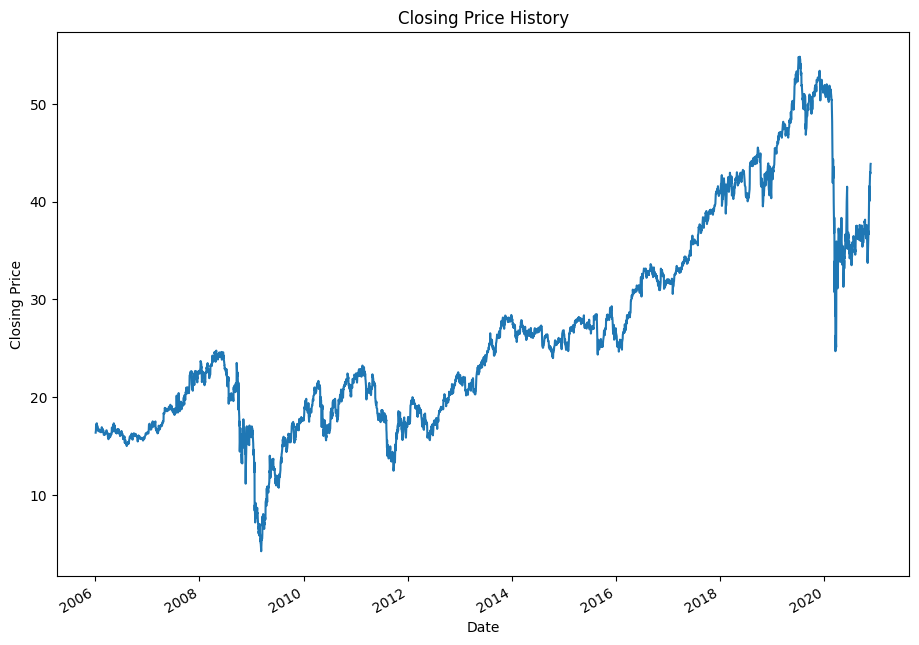

In [7]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

plt.figure(figsize=(11, 8)): Baris ini mengatur ukuran (lebar dan tinggi) dari gambar plot menggunakan fungsi figure() dari pustaka Matplotlib. Angka 11 dan 8 mengindikasikan lebar dan tinggi gambar dalam inci.

train_data['Adj Close'].plot(): Baris ini menggambar garis plot menggunakan fungsi plot() pada kolom 'Adj Close' dari DataFrame train_data. Ini akan menghasilkan plot garis yang menunjukkan perubahan harga penutupan dari waktu ke waktu.

plt.title('Closing Price History'): Baris ini menambahkan judul pada plot menggunakan fungsi title() dari pustaka Matplotlib. Judul yang ditampilkan adalah "Closing Price History".

plt.xlabel('Date'): Baris ini menambahkan label pada sumbu x (horizontal) menggunakan fungsi xlabel() dari pustaka Matplotlib. Label yang ditampilkan adalah "Date" yang menunjukkan bahwa sumbu x mewakili tanggal.

plt.ylabel('Closing Price'): Baris ini menambahkan label pada sumbu y (vertikal) menggunakan fungsi ylabel() dari pustaka Matplotlib. Label yang ditampilkan adalah "Closing Price" yang menunjukkan bahwa sumbu y mewakili harga penutupan.

plt.show(): Baris ini memunculkan plot yang telah dibuat menggunakan fungsi show() dari pustaka Matplotlib. Ini akan menampilkan plot dalam jendela pop-up atau output yang sesuai dengan lingkungan pengembangan yang digunakan.

Dengan kode ini, dapat dilihat grafik perubahan harga penutupan dari train_data dalam bentuk plot garis dengan label sumbu x dan y yang sesuai dalam rentang waktu dari 3 Januari, 2006 sampai 20 November, 2020. Plot ini memberikan informasi visual tentang tren dan fluktuasi harga penutupan dari waktu ke waktu.

<Figure size 1600x800 with 0 Axes>

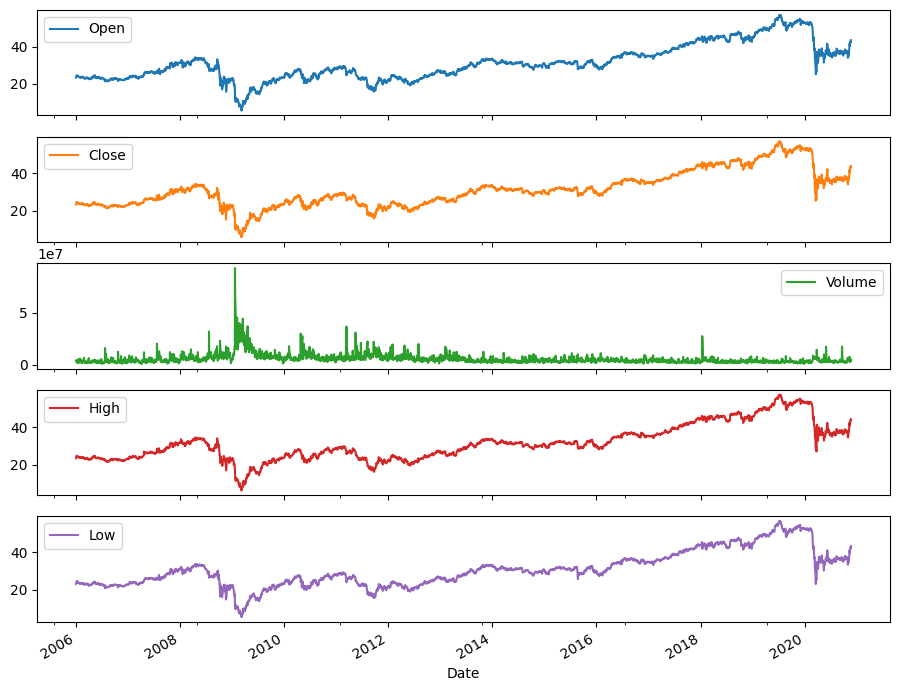

In [8]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

plt.figure(figsize=(16, 8)): Baris ini mengatur ukuran (lebar dan tinggi) dari gambar plot menggunakan fungsi figure() dari pustaka Matplotlib. Angka 16 dan 8 mengindikasikan lebar dan tinggi gambar dalam inci.

cols = ['Open', 'Close', 'Volume', 'High', 'Low']: Baris ini mendefinisikan daftar kolom yang ingin ditampilkan dalam subplot. Dalam contoh ini, daftar kolom terdiri dari 'Open', 'Close', 'Volume', 'High', dan 'Low'.

axes = train_data[cols].plot(figsize=(11, 9), subplots=True): Baris ini membuat subplot untuk setiap kolom dalam daftar cols menggunakan fungsi plot() pada DataFrame train_data. Parameter figsize=(11, 9) mengatur ukuran masing-masing subplot dalam inci. Parameter subplots=True menunjukkan bahwa setiap kolom akan ditampilkan dalam subplot terpisah.

plt.show(): Baris ini memunculkan plot yang telah dibuat menggunakan fungsi show() dari pustaka Matplotlib. Ini akan menampilkan plot dengan subplot dalam jendela pop-up atau output yang sesuai dengan lingkungan pengembangan yang digunakan.

Dengan kode ini, dapat dilihat beberapa subplot dalam satu gambar plot. Setiap subplot akan menampilkan data dari kolom 'Open', 'Close', 'Volume', 'High', dan 'Low' dari DataFrame train_data. Subplot tersebut memberikan gambaran visual tentang perubahan nilai dalam masing-masing kolom dan hubungannya antara kolom tersebut. Pada subplot 'Open', 'Close', 'High', dan 'Low' menampilkan pola data dengan tren fluktuatif. Sedangkan pada subplot 'Volume' menampilkan pola data dengan tren yang cukup stasioner.

In [9]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0: Baris ini menghitung persentase perubahan harga harian (High-Low Percentage) dan menyimpan hasilnya dalam kolom 'HL_PCT' pada DataFrame train_data. Formula (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 digunakan untuk menghitung persentase perubahan antara harga tertinggi (High) dan harga terendah (Low) pada setiap hari. Hal ini memberikan gambaran tentang volatilitas pasar atau seberapa besar fluktuasi harga dalam satu hari.

train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0: Baris ini menghitung persentase perubahan harga penutupan harian (Percentage Change) dan menyimpan hasilnya dalam kolom 'PCT_change' pada DataFrame train_data. Formula (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 digunakan untuk menghitung persentase perubahan antara harga penutupan (Close) dan harga pembukaan (Open) pada setiap hari. Hal ini memberikan informasi tentang seberapa besar perubahan harga dari pembukaan hingga penutupan dalam satu hari.

In [10]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]


Kode tersebut digunakan untuk membuat DataFrame baru yang hanya terdiri dari kolom-kolom tertentu dari DataFrame train_data. Baris kode df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']] menghasilkan DataFrame baru dengan nama df yang hanya berisi kolom-kolom 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume' dari DataFrame train_data.

In [11]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

188


<ipython-input-11-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


forecast_out = int(math.ceil(0.05 * len(df))): Baris ini menghitung jumlah baris data yang akan digunakan sebagai data pengujian atau data yang akan diprediksi. Persentase 5% dari keseluruhan dataset digunakan untuk melihat ke depan atau memprediksi nilai di masa depan. Angka tersebut dihitung dengan mengalikan 0.05 dengan panjang df, dan kemudian diaplikasikan fungsi math.ceil() untuk membulatkan ke atas dan memastikan hasilnya berupa bilangan bulat.

print(forecast_out): Baris ini mencetak jumlah baris data yang akan digunakan sebagai data pengujian atau data yang akan diprediksi.

df['label'] = df['Adj Close'].shift(-forecast_out): Baris ini menambahkan kolom baru 'label' ke DataFrame df yang berisi data harga penutupan yang telah di-shift atau digeser sebanyak forecast_out baris ke atas. Hal ini dilakukan untuk menandai nilai harga penutupan di masa depan yang akan menjadi target prediksi atau nilai yang ingin diprediksi.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Kode tersebut digunakan untuk mengimpor beberapa kelas dan fungsi dari pustaka Scikit-learn (sklearn) yang digunakan dalam analisis dan pemodelan data. Berikut adalah penjelasan mengenai penggunaan masing-masing kelas dan fungsi:

StandardScaler: Kelas ini digunakan untuk melakukan penskalaan fitur dengan menghilangkan rata-rata dan menskalakan unit variansnya. Ini merupakan salah satu metode umum dalam pra-pemrosesan data sebelum memasukkannya ke dalam model.

LinearRegression: Kelas ini mengimplementasikan regresi linier, yang merupakan pendekatan statistik untuk memodelkan hubungan antara variabel independen dan variabel dependen dengan asumsi hubungan linier.

Ridge: Kelas ini mengimplementasikan regresi Ridge, yang adalah varian regresi linier dengan regularisasi L2. Regularisasi ini membantu mencegah overfitting dengan menambahkan penalti pada bobot model yang besar.

RandomForestRegressor: Kelas ini mengimplementasikan regresi dengan menggunakan algoritma Random Forest, yang terdiri dari beberapa pohon keputusan yang dikombinasikan untuk menghasilkan prediksi.

SVR: Kelas ini mengimplementasikan Support Vector Regression, yang merupakan metode regresi yang menggunakan Support Vector Machines (SVM) untuk menghasilkan prediksi.

train_test_split: Fungsi ini digunakan untuk membagi data menjadi subset pelatihan dan pengujian. Ini membantu dalam menguji kinerja model pada data yang tidak digunakan dalam proses pelatihan.

mean_squared_log_error: Fungsi ini menghitung rata-rata dari logaritma dari error kuadrat. Ini merupakan metrik evaluasi yang sering digunakan dalam masalah regresi.

In [13]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


scaler = StandardScaler(): Baris ini membuat objek scaler yang merupakan instance dari kelas StandardScaler. Objek ini akan digunakan untuk melakukan penskalaan fitur pada data.

X = np.array(df.drop(['label'], 1)): Baris ini mengambil semua kolom dari DataFrame df kecuali kolom 'label' dan mengubahnya menjadi array NumPy. Array ini akan digunakan sebagai matriks fitur (X) untuk melatih model.

scaler.fit(X): Baris ini melakukan pembelajaran skala pada data fitur X dengan memanggil metode fit() dari objek scaler. Ini akan menghitung rata-rata dan standar deviasi dari setiap fitur dalam data.

X = scaler.transform(X): Baris ini melakukan transformasi penskalaan pada data fitur X dengan memanggil metode transform() dari objek scaler. Ini mengubah setiap fitur dalam X menjadi bentuk yang terstandarisasi, di mana rata-ratanya menjadi 0 dan variansnya menjadi 1.

In [14]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

X_Predictions = X[-forecast_out:]: Baris ini mengambil forecast_out baris terakhir dari data fitur X dan menetapkannya ke variabel X_Predictions. Subset ini akan digunakan untuk melakukan prediksi pada nilai di masa depan.

X = X[:-forecast_out]: Baris ini menghapus forecast_out baris terakhir dari data fitur X sehingga hanya menyisakan data yang akan digunakan untuk melatih model. Subset ini akan digunakan untuk melatih model dan mempelajari pola dari data yang ada.

In [15]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


df.dropna(inplace=True): Baris ini menghapus baris yang mengandung nilai yang hilang (NaN) dari DataFrame df. Parameter inplace=True digunakan untuk mengubah DataFrame df secara langsung tanpa perlu menugaskan hasil penghapusan ke variabel baru.

y = np.array(df['label']): Baris ini mengambil kolom 'label' dari DataFrame df dan mengubahnya menjadi array NumPy yang disimpan dalam variabel y. Array y ini akan digunakan sebagai target atau nilai yang ingin diprediksi dalam pemodelan.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Baris ini memanggil fungsi train_test_split dengan argumen-argumen berikut:

X: Data fitur yang akan dibagi.
y: Data target yang akan dibagi.
test_size=0.2: Menentukan proporsi data yang akan dialokasikan untuk pengujian. Dalam kasus ini, 20% dari data akan digunakan untuk pengujian.
random_state=42: Menentukan biji acak (random seed) yang akan digunakan dalam pembagian data. Hal ini memastikan bahwa pembagian data akan konsisten setiap kali kode dijalankan.
Hasil dari fungsi train_test_split adalah empat subset: X_train, X_test, y_train, dan y_test. Subset X_train dan y_train akan berisi data fitur dan target yang akan digunakan untuk melatih model, sedangkan subset X_test dan y_test akan berisi data fitur dan target yang akan digunakan untuk menguji atau mengevaluasi model.

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

lr = LinearRegression(): Baris ini membuat objek lr yang merupakan instance dari kelas LinearRegression. Objek ini akan digunakan untuk melatih model regresi linear.

lr.fit(X_train, y_train): Baris ini menggunakan metode fit() dari objek lr untuk melatih model regresi linear menggunakan data pelatihan. Model akan belajar pola dari data fitur X_train dan data target y_train.

lr_confidence = lr.score(X_test, y_test): Baris ini menggunakan metode score() dari objek lr untuk menghitung tingkat kepercayaan (confidence score) dari model regresi linear pada data pengujian. Metode score() menghitung koefisien determinasi (R-squared) yang menunjukkan sejauh mana model dapat menjelaskan variasi dalam data pengujian. Skor kepercayaan ini dapat digunakan untuk mengevaluasi kinerja model pada data pengujian.

In [18]:
lr_confidence

0.7293808055387527

Variabel lr_confidence digunakan untuk mengevaluasi tingkat kepercayaan (confidence score) dari model regresi linear pada data pengujian. saya dapat mencetak atau menampilkan nilai lr_confidence untuk melihat sejauh mana model regresi linear dapat menjelaskan variasi dalam data pengujian. Semakin tinggi nilai lr_confidence, semakin baik model dalam melakukan prediksi pada data pengujian.

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

rf = RandomForestRegressor(): Baris ini membuat objek rf yang merupakan instance dari kelas RandomForestRegressor. Objek ini akan digunakan untuk melatih model regresi menggunakan algoritma Random Forest.

rf.fit(X_train, y_train): Baris ini menggunakan metode fit() dari objek rf untuk melatih model regresi menggunakan data pelatihan. Model akan belajar pola dari data fitur X_train dan data target y_train menggunakan algoritma Random Forest.

rf_confidence = rf.score(X_test, y_test): Baris ini menggunakan metode score() dari objek rf untuk menghitung tingkat kepercayaan (confidence score) dari model regresi pada data pengujian. Metode score() menghitung koefisien determinasi (R-squared) yang menunjukkan sejauh mana model Random Forest dapat menjelaskan variasi dalam data pengujian. Skor kepercayaan ini dapat digunakan untuk mengevaluasi kinerja model pada data pengujian.

In [20]:
rf_confidence

0.887722585396676

rf_confidence adalah variabel yang menyimpan tingkat kepercayaan (confidence score) dari model regresi menggunakan algoritma Random Forest pada data pengujian. saya dapat mencetak atau menampilkan nilai rf_confidence untuk melihat sejauh mana model Random Forest dapat menjelaskan variasi dalam data pengujian. Semakin tinggi nilai rf_confidence, semakin baik model dalam melakukan prediksi pada data pengujian.

In [21]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-21-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

last_date = df.index[-1]: Baris ini mengambil tanggal terakhir dalam indeks DataFrame df dan menyimpannya dalam variabel last_date.

last_unix = last_date.timestamp(): Baris ini mengonversi last_date menjadi waktu dalam satuan detik dengan menggunakan metode timestamp() dan menyimpannya dalam variabel last_unix.

one_day = 86400: Baris ini mendefinisikan nilai one_day yang setara dengan jumlah detik dalam satu hari (24 jam).

next_unix = last_unix + one_day: Baris ini menghitung waktu dalam satuan detik untuk hari berikutnya dengan menambahkan one_day ke last_unix dan menyimpannya dalam variabel next_unix.

forecast_set = rf.predict(X_Predictions): Baris ini menggunakan model regresi Random Forest (rf) untuk melakukan prediksi pada data fitur X_Predictions dan menyimpan hasil prediksi dalam variabel forecast_set.

df['Forecast'] = np.nan: Baris ini menambahkan kolom 'Forecast' ke DataFrame df dan menginisialisasinya dengan nilai NaN (Not a Number).

for i in forecast_set: Baris ini memulai loop untuk setiap nilai prediksi dalam forecast_set.

a. next_date = datetime.datetime.fromtimestamp(next_unix): Baris ini mengonversi next_unix menjadi objek datetime menggunakan datetime.datetime.fromtimestamp() dan menyimpannya dalam variabel next_date.

b. next_unix += 86400: Baris ini menambahkan one_day ke next_unix sehingga mendapatkan waktu dalam satuan detik untuk hari berikutnya.

c. df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]: Baris ini menambahkan baris baru ke DataFrame df dengan indeks next_date. Nilai kolom 'Forecast' pada baris tersebut diisi dengan nilai prediksi i, sementara kolom-kolom lainnya diisi dengan nilai NaN.

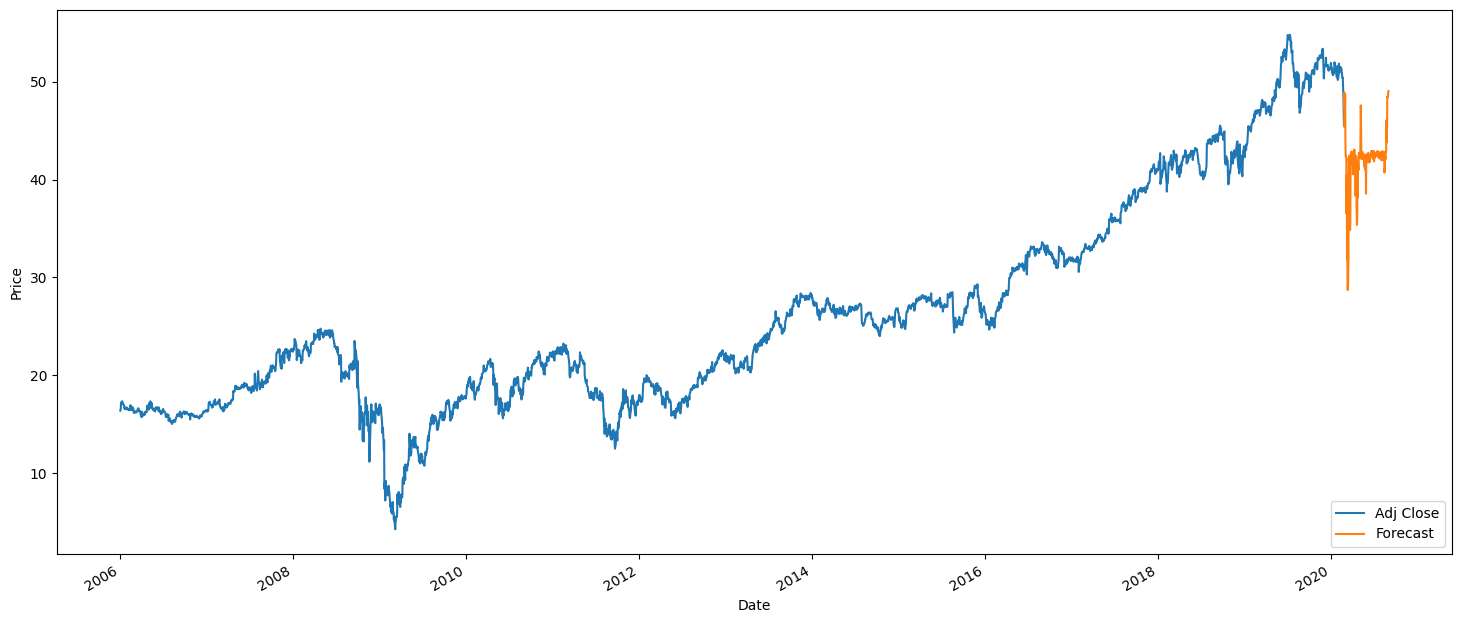

In [22]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(18, 8)): Baris ini membuat objek gambar (figure) dengan ukuran (18, 8), yang akan digunakan sebagai wadah untuk plot.

df['Adj Close'].plot(): Baris ini menggambar plot garis untuk kolom 'Adj Close' dalam DataFrame df. Ini akan memvisualisasikan tren harga penutupan yang sebenarnya.

df['Forecast'].plot(): Baris ini menggambar plot garis untuk kolom 'Forecast' dalam DataFrame df. Ini akan memvisualisasikan prediksi harga penutupan di masa depan.

plt.legend(loc=4): Baris ini menambahkan legenda ke plot, dengan menempatkannya di lokasi 4 (kanan bawah).

plt.xlabel('Date'): Baris ini menambahkan label sumbu x dengan teks 'Date'.

plt.ylabel('Price'): Baris ini menambahkan label sumbu y dengan teks 'Price'.

plt.show(): Baris ini menampilkan plot yang telah dibuat.

Jadi, kode tersebut menghasilkan plot dari dua kolom ('Adj Close' dan 'Forecast') dengan label sumbu-x 'Date' dan label sumbu-y 'Price'.

Dari gambar di atas dapat diketahui hasil forecasting untuk beberapa waktu ke depan dengan menggunakan data historical dari tanggal 3 Januari, 2006 sampai 20 November, 2020 yang dapat ditunjukkan oleh grafik dengan garis berwarna oranye yang dimana hasil forecasting mengalami penurunan kemudian terdapat peningkatan. Namun, dari peningkatan tersebut hanya membuat nilai akhir periode forecasting kembali seperti nilai awal periode forecasting.